# DEPENDENCIES
---

In [1]:
#!/usr/bin/env python3
# coding: utf-8

# color pallet greens https://coolors.co/34463e-a4c3b2-cce3de-eaf4f4-f6fff8
# color pallet secondary https://coolors.co/353535-3c6e71-ffffff-d9d9d9-284b63

import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import os
import datetime
from colour import Color
from colr import color

#Orca must be installed?
#conda install -c plotly plotly-orca
#Kaleido is for exporting images from plotly
#pip install -U kaleido

In [ ]:
def show_svg(filename):
    from IPython.display import SVG, display
    display(SVG(filename=f'fig{filename}.svg'))

# Colors
----

In [2]:
rainbow_colors = ['#F94144', '#f3722c', '#F9844A', '#f8961e', '#F9C74F', '#90BE6D', '#43AA8B', '#4D908E', '#277DA1', '#577590']
print(len(rainbow_colors))

10


In [3]:
red_orange = ['#F94144' ,'#F94A40', '#F9543C', '#F95D37', '#F96733', '#F8702F', '#F87A2B', '#F88326', '#F88D22', '#F8961E']
orange_yellow = ['#F89B23', '#F8A129', '#F8A62E', '#F8AC34', '#F9B139', '#F9B73F', '#F9BC44', '#F9C24A', '#F9C74F']
yellow_green = ['#EDC652', '#E2C556','#D6C459', '#CAC35C', '#BFC260', '#B3C163', '#A7C066', '#9CBF6A', '#90BE6D',]
green_cyan = ['#88BC70', '#87BC70', '#7FBA74', '#76B777', '#6EB57A', '#65B37E','#55B082', '#54AE84', '#4CAC88']
cyan_deepcyan = ['#43AA8B', '#44A78B', '#45A48C', '#479E8C', '#499C8D', '#4A998D', '#4B968D', '#4C968D', '#4D908E']
deepcyan_blue = ['#498E90','#458C92', '#408A94', '#3C8896', '#388599', '#34839B', '#2F819D', '#2B7F9F', '#277DA1']
blue_darkblue = ['#2C7C9F', '#327B9D', '#377A9B', '#3C7999', '#427998', '#477896', '#4C7794', '#527692', '#577590']

gradient = red_orange + orange_yellow + yellow_green + green_cyan + cyan_deepcyan + deepcyan_blue + blue_darkblue
print(len(gradient))
# gradient = red_orange + orange_yellow + yellow_green + cyan_deepcyan + deepcyan_blue + blue_darkblue
# print(len(gradient))

64


In [4]:
from colour import Color
start = Color("#F94144")
colors = list(start.range_to(Color("#CAC35C"),20))
str(colors[1])


color_list = []
for i in range(len(colors)):
    color_list.append(str(colors[i]))

In [5]:
color

<bound method Colr.color of ''>

In [6]:
from colr import color
print(color('test', fore='F94144', back='000'))

test


In [7]:
for i in gradient:
    print(color('■', fore=i, back='000'), end='')

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

In [8]:
for i in gradient:
    print(color(f'{i}', fore=i, back='000'), end='')

#F94144#F94A40#F9543C#F95D37#F96733#F8702F#F87A2B#F88326#F88D22#F8961E#F89B23#F8A129#F8A62E#F8AC34#F9B139#F9B73F#F9BC44#F9C24A#F9C74F#EDC652#E2C556#D6C459#CAC35C#BFC260#B3C163#A7C066#9CBF6A#90BE6D#88BC70#87BC70#7FBA74#76B777#6EB57A#65B37E#55B082#54AE84#4CAC88#43AA8B#44A78B#45A48C#479E8C#499C8D#4A998D#4B968D#4C968D#4D908E#498E90#458C92#408A94#3C8896#388599#34839B#2F819D#2B7F9F#277DA1#2C7C9F#327B9D#377A9B#3C7999#427998#477896#4C7794#527692#577590

In [9]:
#help('colour')

for i in colors:
    print(color('■', fore=str(i), back='000'), end='')

■■■■■■■■■■■■■■■■■■■■

In [10]:
rainbow_colors = ['#F94144', '#f3722c', '#F9844A', '#f8961e', '#F9C74F', '#90BE6D', '#43AA8B', '#4D908E', '#277DA1', '#577590']
# color= rainbow_colors[:len(cat_order['category'])+1]

# DATA

In [12]:
# data_df = pd.read_csv('sample_data_month_categories.csv')
data_df = pd.read_csv('../data/sample_data_month_categories.csv')
#data_df = pd.read_csv('../test/organized.csv')
col_names = []
for col in data_df.columns:
    col_names.append(col)
col_data = []
for i in col_names:
    col_data.append(data_df[i])

In [13]:
data_df.head()

,date,transaction,amount,identifier,category
0,03/31/2021,"TRELLO.COM, ATLASSIAN 888-942-1573 NY",-69.99,"TRELLO.COM,",work
1,04/05/2021,KROGER #456 MARTINSBURG NC,-229.12,KROGER,food
2,04/05/2021,HOME DEPOT #11154 MARTINSBURG NC,-20.00,DEPOT,home
3,04/05/2021,JAPANESE RESTAURANT MARTINSBURG NC,-48.39,RESTAURANT,restaurants
4,04/06/2021,TRACTOR SUPPLY #5555 NEWARK NY,-27.50,TRACTOR,home


In [14]:
def make_num(df, col_name):
    newCol = []
    for i in range(len(df)):
        newCol.append(convert_amount(df[col_name][i]))
    df[col_name] = newCol
    return df.reset_index(drop=True)

def convert_amount(entry):
    # there are entries where there is no balance listed
    entry = str(entry).strip()
    if "--" in entry:
        return 0
    # making the float negative
    if "-" in entry:
        return float(entry.translate({ord(i): None for i in "$-,"})) * -1
    else:
        return float(entry.translate({ord(i): None for i in "$-,"}))

def convert_date(original_df):
    import datetime
    df = original_df.rename(str.lower, axis='columns')
    list_cols = [i.lower() for i in df.columns.tolist()]
    test_cols = ["date", "day", "time", "occurrence"]
    verified_cols = []
    for col in list_cols:
        for test in test_cols:
            if test in col:
                verified_cols.append(col.lower())
    for tested in verified_cols:
        search_dates = df[tested].apply(
            lambda x: 'True' if isinstance(x, datetime.date) else 'False')
        if not search_dates.any():
            p_slash()
            print('ALL DATES ARE IN DATETIME SKIPPING')
            p_slash()
            continue
        elif (df[tested].map(type) == str).all():
            date_time = []
            for j in df[tested]:
                if len(j) == 10 and '/' in j:
                    date_time.append(
                        datetime.datetime.strptime(j, "%m/%d/%Y"))
                elif len(j) == 8 and '/' in j:
                    date_time.append(
                        datetime.datetime.strptime(j, "%m/%d/%y"))
                elif len(j) == 10 and '-' in j:
                    date_time.append(
                        datetime.datetime.strptime(j, "%Y-%m-%d"))
                else:
                    print("UNKNOWN DATE FORMAT SKIPPING FORMATTING")
                    return df
            df[tested] = date_time
            df[tested] = pd.to_datetime(df[tested]).apply(lambda x: x.date())
            df = df.sort_values(
                by=[tested]).reset_index(drop=True)
            # Want to use sort_values by tested, however, because its a loop it wont choose the primary date col
            # df = df.sort_values(
            #     by=['date', 'transaction', 'amount']).reset_index(drop=True)
            # (by=['date', 'category', 'identifier', 'amount']
        else:
            print('your dates are a mess, see your programmer')
    return df

In [15]:
if 'Date2' in data_df.columns:
    data_df=data_df.drop('Date2', axis=1)
    data_df.head()

In [16]:
data_df = convert_date(data_df)
#data_df = make_num(data_df, 'amount')

In [17]:
if 'category' in data_df.columns:
    data_df = data_df.loc[data_df['category'] != 'payment']
    data_df = data_df.loc[data_df['category'] != 'interest']

# Adding Month and Day Num Cols 
---

In [18]:
# Adding a numerical day for data, and a word value for day of week
data_df['day'] = pd.DatetimeIndex(data_df['date']).day
data_df['long_day'] = list(map(lambda x: datetime.datetime.strptime(str(x), "%d").strftime("%A"), data_df['day']))

# Adding a numerical value col for month and a word value for mo
data_df['month'] = pd.DatetimeIndex(data_df['date']).month
data_df['long_month'] = list(map(lambda x: datetime.datetime.strptime(str(x), "%m").strftime("%B"), data_df['month']))

# Fixing order
reorder = data_df[['month', 'day']].copy(deep=True)
data_df = data_df.drop(columns=['month','day'])
data_df['month'] = reorder['month']
data_df['day'] = reorder['day']

data_df.head()

,date,transaction,amount,identifier,category,long_day,long_month,month,day
0,2021-03-31,"TRELLO.COM, ATLASSIAN 888-942-1573 NY",-69.99,"TRELLO.COM,",work,Wednesday,March,3,31
1,2021-04-05,KROGER #456 MARTINSBURG NC,-229.12,KROGER,food,Friday,April,4,5
2,2021-04-05,HOME DEPOT #11154 MARTINSBURG NC,-20.00,DEPOT,home,Friday,April,4,5
3,2021-04-05,JAPANESE RESTAURANT MARTINSBURG NC,-48.39,RESTAURANT,restaurants,Friday,April,4,5
4,2021-04-06,TRACTOR SUPPLY #5555 NEWARK NY,-27.50,TRACTOR,home,Saturday,April,4,6


# ******Whole month total for spending

---

In [19]:
if 'category' in data_df.columns:
    month_sum = (data_df.groupby(['month', 'long_month'])['amount'].sum()).to_frame(name='month_sum').reset_index()
    month_categories = (data_df.groupby(['month', 'category', 'long_month'])['amount'].sum()).to_frame(name='month_sum').reset_index()
else:
    month_sum = (data_df.groupby(['month', 'long_month'])['amount'].sum()).to_frame(name='month_sum').reset_index()
    month_categories = (data_df.groupby(['month', 'long_month'])['amount'].sum()).to_frame(name='month_sum').reset_index()

month_sum

,month,long_month,month_sum
0,3,March,-69.99
1,4,April,-1195.79
2,5,May,-143.40


# Spending by Category summed into Months

----

# Removing Payment category

In [20]:
if 'category' in data_df.columns:
    month_categories = month_categories.loc[month_categories['category'] != 'payment']
    month_categories = month_categories.sort_values(by=['month', 'month_sum']).reset_index(drop=True)
    month_categories.head()

# DICTIONARY OPTIONS

-------------------------------------------------------------------------------------------------------------------

 |   |   |   |   |   | |||
|---|---|---|---|---|---|---|---|
 | **parent**       | **type**         | **priority**     | **fixed/variable** | **one-time/re-occuring** | **identifier**    | **amount**  | **date**    | **transaction**                   |
 | health       |life insurance| essential    | fixed          | re-occuring          | 'AAA Insurance| -50     | 01/22/21| AAA INSURANCE PAYMENT 48684   |
 | entertainment|movies        | non-essential| variable       | one-time             | 'REGAL'       | -15     | 01/12/21| CINEMA REGAL PARK WEST VA 1588|

In [21]:
# Thinking about adding another column based on this data
# dataframe might look good like
# where parent = budget category
# | parent       | type         | priority     | fixed/variable | one-time/re-occuring | identifier    | amount  | date    | transaction                   |
# | health       |life insurance| essential    | fixed          | re-occuring          | 'AAA Insurance'| -50     | 01/22/21| AAA INSURANCE PAYMENT 48684   |
# | entertainment|movies        | non-essential| variable       | one-time             | 'REGAL'       | -15     | 01/12/21| CINEMA REGAL PARK WEST VA 1588|

fixed = {
    'debt':['car loan', 'student loan/tution'],
    'housing':['home owners insurance', 'renters insurance', 'rent', 'mortgage', 'property taxes'],
    'utilities':['cable', 'internet', 'garbage'],
    'medical':['health insurance'],
    'childcare':['daycare', 'child support'],
    'entertainment':['streaming services']
}

variable = {
    'utilities':['water', 'electricity', 'gas', 'phone']
}

essentials = {
    'savings' : ['life insurance', 'emergency fund', 'ROTH IRA', '401(k)', 'college fund', 'mad money'],
    'debt' : ['credit card', 'car loan', 'student loan', 'tuition', 'pay day loan', 'other' ],
    'domicile' : ['home', 'renters insurance', 'home insurance', 'rent', 'mortgage', 'repair', 'maitenance', 'furnishings', 'property taxes', 'yard', 'cleaning supply', 'kitchen ware','tools'],
    'transportation' : ['car insurance','maintenance', 'gas' 'bus', 'subway', 'train', 'ferry fare'],
    'food' : ['groceries', 'dining out', 'fast food', 'delivery', 'alcohol'],
    'utilities' : ['phone', 'cable', 'internet', 'water', 'gas', 'electricity', 'garbage', 'utility'], #oil, wood
    'medical' : ['health insurance','doctor', 'prescriptions', 'first aid supply'], #types of doctors, optometrist, dentist, etc
    'education' : ['supplies', 'fees', 'books'],
    'childcare' : ['daycare', 'camps', 'babysitter', 'child support'],
    'personal' : ['clothing', 'toiletries', 'grooming']
}

non_essentials = {
    'food' :['dining out', 'fast food', 'delivery', 'alcohol'],
    'gifts' : ['birthday', 'anniversary', 'holiday', 'other'],
    'giving': ['tithing', 'charitable', 'other'],
    'pets': ['food', 'supplies', 'vet', 'prescriptions'],
    'entertainment': ['streaming services','games', 'movies', 'hobbies', 'vacation', 'books'],
    'personal': ['salon', 'gym', 'dry cleaning']
    
}
#'domicile' : {'home': ['home insurance', 'mortgage', 'mortgage payment', 'home maitenance', 'home repair', 'property taxes', 'yard'],
#                'rental':['renters insurance', 'rent', 'rent payment', 'rental repair'],
#                 'furnishings':['furnishings', 'cleaning supply', 'kitchen ware','tools']},

In [22]:
inside = ['savings', 'savings', 'debt', 'housing', 'transportation', 'food', 'utilities', 'medical', 'education', 'childcare', 'personal']

In [23]:
outside = ['essential' for i in range(len(inside))]

In [24]:
# red to blue/purple
rainbow_colors = ['#F94144', '#f3722c', '#F9844A', '#f8961e', '#F9C74F', '#90BE6D', '#43AA8B', '#4D908E', '#277DA1', '#577590']

# PRETTY TREEMAP

-------------------------------------------------------------------------------------------------------------------

- FIX Legend
- Change rainbow colors from a list to a dictionary and grab the correct values accordingly'
- ie if data 100-90 red, 90-80 orange, 80-70 yellow, 70-60 green, 60-50 blue, 50-40, purple and on until 10-0
- fix hover put something relevant

# TreeMap for all Months consolidated

In [25]:
#Making random data to create treemap

import random
def constrain_sum(n, total):
    # Return an randomly chosen list of n positive intergers summing to 100/total
    dividers = sorted(random.sample(range(1, total), n-1))
    return [a - b for a,b in zip(dividers + [total], [0]+dividers)]
nums = constrain_sum(len(inside), 100)

In [26]:
groups_all = list(essentials.keys()) + list(non_essentials)
nums_all = constrain_sum(len(groups_all), 100)
priority_all = ['Essential' if x in essentials.keys() else 'Non Essential' for x in groups_all]
percentages_all = [str(nums_all[i])+'%' for i in range(len(nums_all))]
# Create a data frame with fake data
# df = pd.DataFrame({'nb_people':[8,3,4,2],
#                    'group':["Housing\n 40%",
#                             "Utilities\n 10%",
#                             "Food\n 10%",
#                             "Entertainment\n 10%"]})
df_all = pd.DataFrame(
    {
        'priority': priority_all,
        'categories':groups_all,
        'values': nums_all,
        'percentages':percentages_all
                  })

In [27]:
colors_all = rainbow_colors[:len(groups_all)+1]
counter = len(colors_all)
while counter < len(df_all):
    colors_all.append(rainbow_colors[len(df_all)-counter])
    counter += 1
#colors_all

In [28]:
df_all.head()

,priority,categories,values,percentages
0,Essential,savings,16,16%
1,Essential,debt,7,7%
2,Essential,domicile,1,1%
3,Essential,transportation,8,8%
4,Essential,food,2,2%


In [29]:
sorted_df = df_all.sort_values(by=['values', 'categories']).reset_index(drop=True)
sorted_df.head()

,priority,categories,values,percentages
0,Essential,domicile,1,1%
1,Essential,education,1,1%
2,Non Essential,entertainment,1,1%
3,Essential,utilities,1,1%
4,Essential,food,2,2%


In [41]:
import plotly.express as px
fig = px.treemap(df_all.sort_values(by=['values','categories']).reset_index(drop=True),
                 path=['priority', 'categories', 'percentages'], 
                 values='values', 
                 color='values')
fig.update_traces(marker_colors= colors_all, selector=dict(type='treemap')) 
#fig.update_traces(pathbar_visible=False, selector=dict(type='treemap'))
fig.write_image('fig_total.svg')
fig.show()

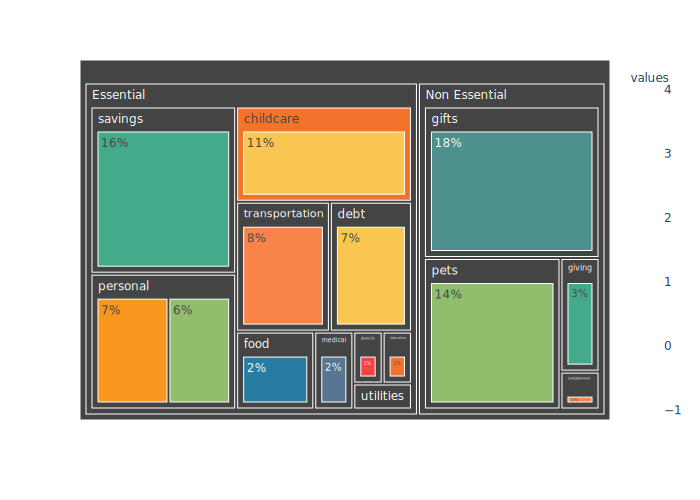

In [43]:
show_svg('_total')

# TreeMap with Data
---

In [31]:
month_sum = (data_df.groupby(['month', 'long_month'])['amount'].sum()).to_frame(name='month_sum').reset_index()
month_categories = (data_df.groupby(['month', 'category', 'long_month'])['amount'].sum()).to_frame(name='month_sum').reset_index()

#month_categories.head(40)

month_categories.head()

months = month_categories['month'].unique()
months = list(months)
months

###
def get_percentage(month_num):
    perc = []
    mo_slice = month_categories[month_categories['month'] == month_num]
    sum_mo_1 = mo_slice['month_sum'].sum()
    for i in range(len(month_categories)):
        if month_categories['month'][i] == month_num:
            #print(round(month_categories['month_sum'][i], 2))
            #print(round(sum_mo_1)*100)
            amount = round(month_categories['month_sum'][i]/round(sum_mo_1)*100, 2)
            #print(amount)
            #break
            perc.append(amount)
    return perc

percentage = []
final = []
for month in months:
    percentage.append(get_percentage(month))
final = [a for b in percentage for a in b]
month_categories['values'] = final

In [32]:
month_categories.head()

,month,category,long_month,month_sum,values
0,3,work,March,-69.99,99.99
1,4,fast_food,April,-71.66,5.99
2,4,food,April,-245.21,20.50
3,4,fun,April,-31.84,2.66
4,4,gas,April,-63.44,5.30


# Looped Treemap by Month

---

###  - remember to toggle cell to remove slider

In [33]:
def search_values(cat, cat_dict, df):
    for value in essentials.values():
        if cat in value:
            return True

    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    fig = make_subplots(rows = 6, cols = 6,
                        column_widths = [0.4 for i in range(6)],
                        subplot_titles= (df.long_month.unique()))

def make_treemap(df, months):
    import plotly.express as px
    df['month_sum_s'] = [f'${str(i)}' for i in df.month_sum]
    fig = px.treemap(df.sort_values(by=['values']).reset_index(drop=True), 
                     title= f"{df['long_month'][0]} Spending",
                     path=['priority','category'],
                     values='values', 
                     color= 'month_sum',
                     color_continuous_scale= gradient[::-1],
                     color_continuous_midpoint=np.average(df['month_sum'], weights=df['values']),
                     hover_name='month_sum',
                     custom_data = ['month_sum_s','percentages'])
    #fig.update_traces(marker_colors = colors_all, selector=dict(type='treemap'))
    #visual = df.loc[df['long_month'] == month]['month_sum_s']
    #fig.update_traces(hovertemplate='%{month_sum}')
    fig.data[0].hovertemplate = '%{label}'
    fig.update_traces(
    hovertemplate="<br>".join([
        "Dollars: %{customdata[0]}",
        "Percentage: %{customdata[1]}"
    ])
)
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig.write_image(f'fig{months}.svg')
    fig.show()

def loop_plots(months, df):
    for i, month in enumerate(months):
        i = i+1
        split_month_df = df.loc[df['month'] == month].reset_index(drop=True)
        priority = []
        for cat in split_month_df.category:
                if cat in essentials.keys() or search_values(cat, essentials, df):
                    priority.append('Essential')
                else:
                     priority.append('Non-Essential')
        split_month_df['priority'] = priority
        split_month_df['values'] = split_month_df['values'].apply(lambda x: x*-1 if x < 0 else x)
        split_month_df['month_sum'] = split_month_df['month_sum'].apply(lambda x: round(x*-1) if x < 0 else round(x))
        split_month_df['percentages'] = split_month_df['values'].apply(lambda x : str(x*-1)+'%' if x < 0 else str(x)+'%')
        split_month_df['month_sum'] = split_month_df['month_sum'].apply(lambda x : round(x, 2))
        make_treemap(split_month_df, month)

In [34]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# fig = make_subplots(rows = 6, cols = 6,
#                     column_widths = [0.4 for i in range(6)],
#                     subplot_titles= (month_categories.long_month.unique()))

    #specs = [{'type':'treemap', 'rowspan': len(months/2)}, 'type':'treemap']]
    

In [35]:
months

[3, 4, 5]

In [36]:
#Need to add a if you want to see one month, all months or some months query

In [37]:
loop_plots(months, month_categories)

# Displaying Looped Treemap Results on Notebook

In [38]:
def show_svg(filename):
    from IPython.display import SVG, display
    display(SVG(filename=f'fig{filename}.svg'))

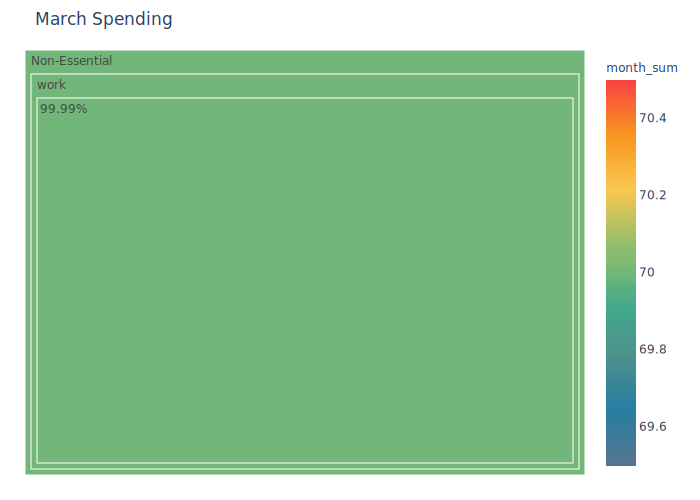

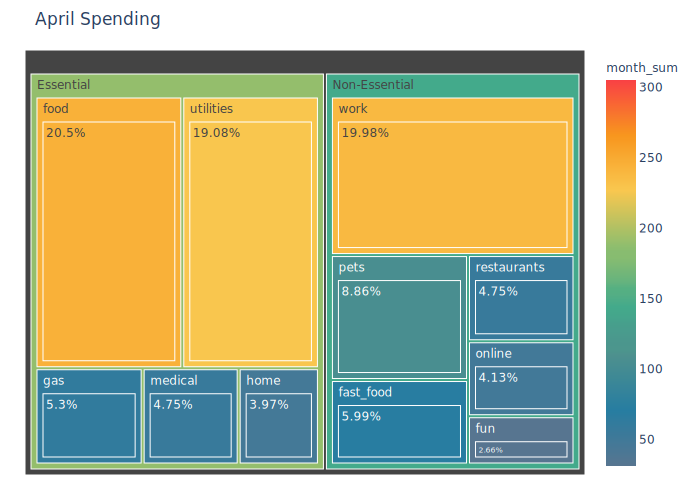

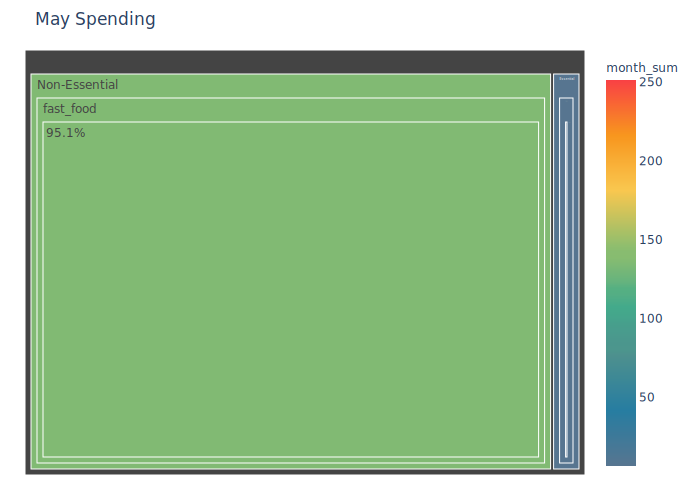

In [39]:
for i in months:
    show_svg(i)